In [1]:
import datetime
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [4]:
def classifier(time_freq):
    computed_data = pd.read_csv('labeled_features/features_' + time_freq + '.csv.gz', parse_dates=['date'])

    features = ['std_rush_order',
                'avg_rush_order',
                'std_trades',
                'std_volume',
                'avg_volume',
                'std_price',
                'avg_price',
                'avg_price_max',
                'hour_sin',
                'hour_cos',
                'minute_sin',
                'minute_cos']

    X = computed_data[features]
    Y = computed_data['gt'].astype(int).values.ravel()

    # Define both classifiers
    classifiers = {
        "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1),
        "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                                       n_estimators=100, learning_rate=0.5, random_state=0)
    }

    cv_list = [5]
    processes = 7

    for clf_name, clf in classifiers.items():
        print(f"\nEvaluating {clf_name} classifier for time frequency {time_freq}")
        for n_fold in cv_list:
            print('Processing: {} folds'.format(n_fold))
            y_pred = cross_val_predict(clf, X, Y, cv=StratifiedKFold(n_splits=n_fold), n_jobs=processes)
            print('Recall: {:.3f}'.format(recall_score(Y, y_pred)))
            print('Precision: {:.3f}'.format(precision_score(Y, y_pred)))
            print('F1 score: {:.3f}'.format(f1_score(Y, y_pred)))

if __name__ == '__main__':
    start = datetime.datetime.now()
    classifier(time_freq='25S')
    classifier(time_freq='15S')
    classifier(time_freq='5S')
    print(datetime.datetime.now() - start)


Evaluating RandomForest classifier for time frequency 25S
Processing: 5 folds
Recall: 0.890
Precision: 0.966
F1 score: 0.926

Evaluating AdaBoost classifier for time frequency 25S
Processing: 5 folds
Recall: 0.918
Precision: 0.970
F1 score: 0.943

Evaluating RandomForest classifier for time frequency 15S
Processing: 5 folds
Recall: 0.855
Precision: 0.968
F1 score: 0.908

Evaluating AdaBoost classifier for time frequency 15S
Processing: 5 folds
Recall: 0.861
Precision: 0.935
F1 score: 0.897

Evaluating RandomForest classifier for time frequency 5S
Processing: 5 folds
Recall: 0.735
Precision: 0.943
F1 score: 0.826

Evaluating AdaBoost classifier for time frequency 5S
Processing: 5 folds
Recall: 0.779
Precision: 0.898
F1 score: 0.834
0:16:42.071494


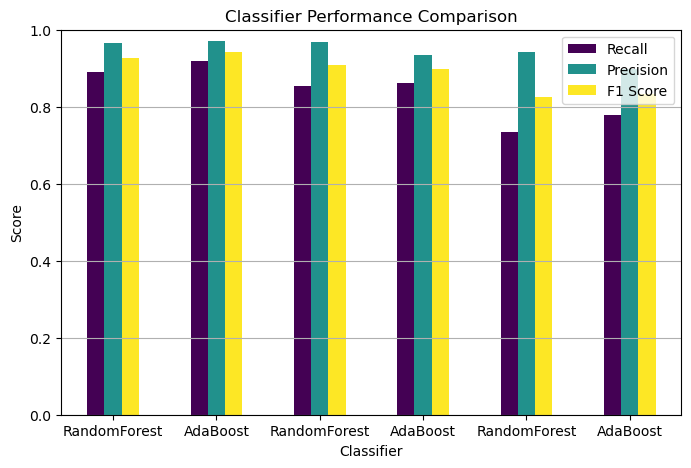

In [2]:
results_df = pd.DataFrame([
    # 25S
    {"Time_Freq": "25S", "Classifier": "RandomForest", "Recall": 0.890, "Precision": 0.966, "F1 Score": 0.926},
    {"Time_Freq": "25S", "Classifier": "AdaBoost", "Recall": 0.918, "Precision": 0.970, "F1 Score": 0.943},
    
    # 15S
    {"Time_Freq": "15S", "Classifier": "RandomForest", "Recall": 0.855, "Precision": 0.968, "F1 Score": 0.908},
    {"Time_Freq": "15S", "Classifier": "AdaBoost", "Recall": 0.861, "Precision": 0.935, "F1 Score": 0.897},
    
    # 5S
    {"Time_Freq": "5S", "Classifier": "RandomForest", "Recall": 0.735, "Precision": 0.943, "F1 Score": 0.826},
    {"Time_Freq": "5S", "Classifier": "AdaBoost", "Recall": 0.779, "Precision": 0.898, "F1 Score": 0.834},
])

# Set Classifier as index for plotting
results_df_plot = results_df.set_index('Classifier')

# Plot bar chart
results_df_plot.plot(kind='bar', figsize=(8,5), rot=0, ylim=(0,1), colormap='viridis')
plt.title('Classifier Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Classifier')
plt.grid(axis='y')
plt.show()

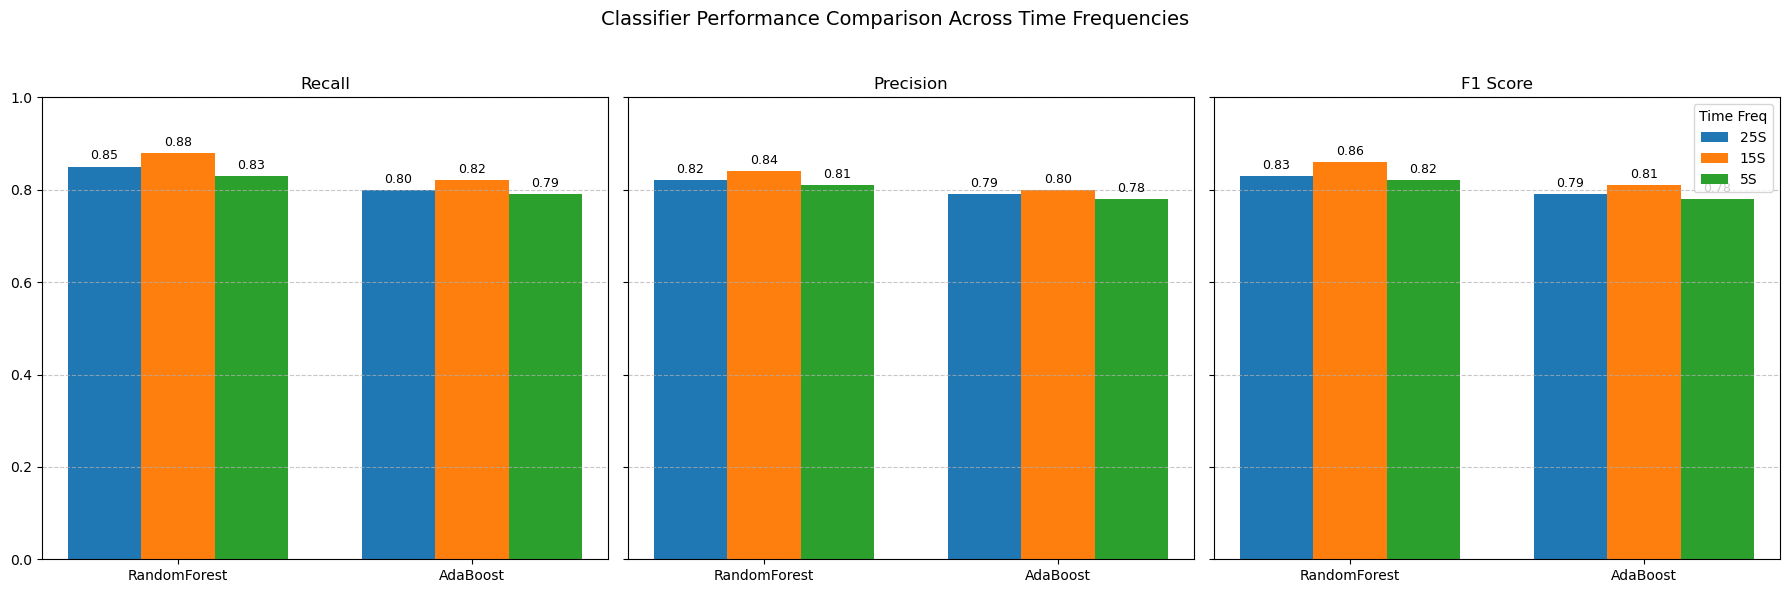

In [3]:
# Assuming results_all is collected like this after running all classifiers:
results_all = pd.DataFrame([
    {"Time": "25S", "Classifier": "RandomForest", "Recall": 0.85, "Precision": 0.82, "F1 Score": 0.83},
    {"Time": "25S", "Classifier": "AdaBoost", "Recall": 0.80, "Precision": 0.79, "F1 Score": 0.79},
    {"Time": "15S", "Classifier": "RandomForest", "Recall": 0.88, "Precision": 0.84, "F1 Score": 0.86},
    {"Time": "15S", "Classifier": "AdaBoost", "Recall": 0.82, "Precision": 0.80, "F1 Score": 0.81},
    {"Time": "5S", "Classifier": "RandomForest", "Recall": 0.83, "Precision": 0.81, "F1 Score": 0.82},
    {"Time": "5S", "Classifier": "AdaBoost", "Recall": 0.79, "Precision": 0.78, "F1 Score": 0.78},
])

results_df = pd.DataFrame(results_all)

metrics = ['Recall', 'Precision', 'F1 Score']
time_freqs = results_df['Time'].unique()
classifiers = results_df['Classifier'].unique()

fig, axes = plt.subplots(1, len(metrics), figsize=(18,6), sharey=True)

for i, metric in enumerate(metrics):
    ax = axes[i]
    width = 0.25  # width of a bar
    for j, tf in enumerate(time_freqs):
        subset = results_df[results_df['Time'] == tf]
        positions = [x + j*width for x in range(len(classifiers))]
        bars = ax.bar(positions, subset[metric], width=width, label=tf)
        # Annotate scores on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    ax.set_xticks([x + width for x in range(len(classifiers))])
    ax.set_xticklabels(classifiers, fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if i == len(metrics) - 1:
        ax.legend(title='Time Freq')

plt.suptitle('Classifier Performance Comparison Across Time Frequencies', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
